In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install sounddevice

In [3]:
import csv
import math
import random
import numpy as np
import pandas as pd
import sounddevice as sd
import matplotlib.pyplot as plt

In [4]:
#Para realizar el gradiente descenciente, se toma de muestra el ejemplo del documento

def predict_y_info(a, b, c, d, x):
    return a * math.cos(b*x + c) + d

def gradient_descent_function(x, y, epochs):
    learning_rate  = 0.05
    size_x = len(x)
    batch_size = 100
    rsl = []
    value_a = random.random()
    value_b = random.random()
    value_c = random.random()
    value_d = 0
    for i in range(epochs):
        value_a_gradient = 0
        value_b_gradient = 0
        value_c_gradient = 0
        value_d_gradient = 0
        value_e = 0       
        for m in range(batch_size):
            ix = int(random.uniform(0, size_x))
            prediction = predict_y_info(value_a, value_b, value_c, value_d, x[ix])
            const = y[ix] - prediction
            value_e += const * const           
            value_a_gradient += -2 * const * math.cos(value_b * x[ix] + value_c)
            value_b_gradient += 2 * const * (value_a * x[ix] * math.sin(value_b * x[ix] + value_c))
            value_c_gradient += 2 * const * (value_a * math.sin(value_b * x[ix] + value_c))
            #value_d_gradient += -2 * const
        
        value_a = value_a - learning_rate * value_a_gradient / batch_size
        value_b = value_b - learning_rate * value_b_gradient / batch_size
        value_c = value_c - learning_rate * value_c_gradient / batch_size
        #value_d = value_d - learning_rate * value_d_gradient / batch_size
        
        value_e = value_e/batch_size
        rsl.append([value_a, value_b, value_c, value_d, value_e])
        print(f"error:{value_e} period:{value_b} amplitude:{value_a} constants:{value_c}\n")

    return rsl, value_a, value_b, value_c, value_d

In [5]:
data_train = pd.read_csv('dataSenal/train.csv')

In [6]:
value_x_train = data_train['x'].values
value_target_train = data_train['TARGET'].values

In [7]:
results_train, result_a, result_b, result_c, result_d = gradient_descent_function(value_x_train, value_target_train, epochs=10)

error:0.498837494273937 period:0.3893104851399799 amplitude:0.7065041809794496 constants:0.7848406580913884

error:0.06859890840592038 period:0.44553401233383955 amplitude:0.7122460294957143 constants:0.7842420783455276

error:0.09650927927691427 period:0.38444268160251854 amplitude:0.7127093236679488 constants:0.7680703918838403

error:0.06837705403025905 period:0.4395927369077095 amplitude:0.7177945055511604 constants:0.7675039375443186

error:0.0724350299451785 period:0.39493421139136287 amplitude:0.7189165018440935 constants:0.7550921538329749

error:0.053425278476673416 period:0.4230031825854607 amplitude:0.722642071327538 constants:0.7520182509227853

error:0.0570501793013263 period:0.409116881418043 amplitude:0.7251837480445713 constants:0.7432805320811544

error:0.057376198280990345 period:0.4189236913315 amplitude:0.7299232721499087 constants:0.7369923811148062

error:0.05396489757721998 period:0.4054252937308416 amplitude:0.7334928911806359 constants:0.7284387332131704

error

In [8]:
dataframe_result_train = pd.DataFrame(results_train, columns=['Amplitude', 'Period', 'Constant', 'D', 'Error'])
dataframe_result_train

Amplitude    Period  Constant  D     Error
0   0.706504  0.389310  0.784841  0  0.498837
1   0.712246  0.445534  0.784242  0  0.068599
2   0.712709  0.384443  0.768070  0  0.096509
3   0.717795  0.439593  0.767504  0  0.068377
4   0.718917  0.394934  0.755092  0  0.072435
5   0.722642  0.423003  0.752018  0  0.053425
6   0.725184  0.409117  0.743281  0  0.057050
7   0.729923  0.418924  0.736992  0  0.057376
8   0.733493  0.405425  0.728439  0  0.053965
9   0.735268  0.410153  0.722090  0  0.052251

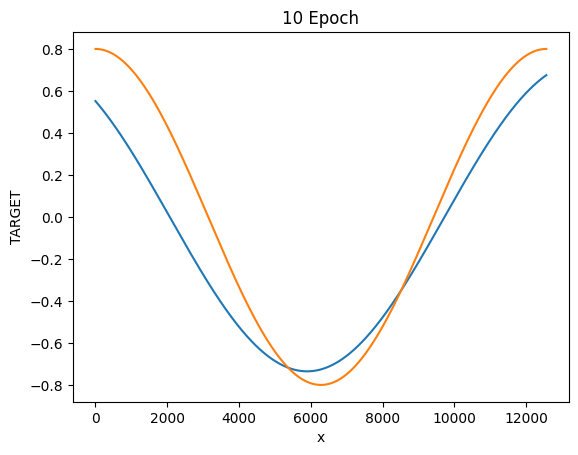

In [9]:
plt.title("10 Epoch")
plt.xlabel('x')
plt.ylabel("TARGET")
plt.plot([predict_y_info(result_a, result_b, result_c, result_d, iterator)for iterator in value_x_train[:-1]])
plt.plot(value_target_train)

plt.show()

In [10]:
results_train_2, result_a_2, result_b_2, result_c_2, result_d_2 = gradient_descent_function(value_x_train, value_target_train, epochs=400)

error:0.6207522517777665 period:0.6502087334120251 amplitude:0.5371378461136349 constants:0.6552960978041611

error:0.4742200482999504 period:0.5086880807413126 amplitude:0.5127149490856795 constants:0.632499041034191

error:0.14413832794631634 period:0.43798740920122037 amplitude:0.5175206753971147 constants:0.6182789540467046

error:0.07161471640924133 period:0.4356992545087721 amplitude:0.5303695348677427 constants:0.6135773039391568

error:0.0654037316357518 period:0.4338550722511805 amplitude:0.5433298582721037 constants:0.6094928299174868

error:0.065653973913455 period:0.4282461055027225 amplitude:0.5558978692989404 constants:0.6044481413489272

error:0.06102713174497205 period:0.43376668493216697 amplitude:0.5681003518848032 constants:0.6008810921785689

error:0.05855111027848631 period:0.430194619674385 amplitude:0.5794814887259546 constants:0.5958581108941814

error:0.051636221772559276 period:0.4359844367406893 amplitude:0.5906939673623398 constants:0.5926174873499461

error

In [11]:
dataframe_result_train_2 = pd.DataFrame(results_train_2, columns=['Amplitude', 'Period', 'Constant', 'D', 'Error'])
dataframe_result_train_2.head(12)

Amplitude    Period  Constant  D     Error
0    0.537138  0.650209  0.655296  0  0.620752
1    0.512715  0.508688  0.632499  0  0.474220
2    0.517521  0.437987  0.618279  0  0.144138
3    0.530370  0.435699  0.613577  0  0.071615
4    0.543330  0.433855  0.609493  0  0.065404
5    0.555898  0.428246  0.604448  0  0.065654
6    0.568100  0.433767  0.600881  0  0.061027
7    0.579481  0.430195  0.595858  0  0.058551
8    0.590694  0.435984  0.592617  0  0.051636
9    0.602022  0.434318  0.587222  0  0.059060
10   0.610992  0.440777  0.583394  0  0.049080
11   0.617858  0.428285  0.576782  0  0.049297

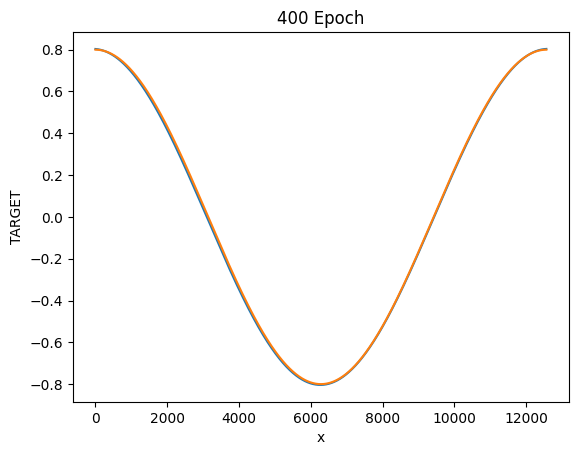

In [12]:
plt.title("400 Epoch")
plt.xlabel('x')
plt.ylabel("TARGET")
plt.plot([predict_y_info(result_a_2, result_b_2, result_c_2, result_d_2, iterator)for iterator in value_x_train[:-1]])
plt.plot(value_target_train)

plt.show()

In [13]:
results_train_3, result_a_3, result_b_3, result_c_3, result_d_3 = gradient_descent_function(value_x_train, value_target_train, epochs=1000)

error:0.10591199223999247 period:0.5042205337641138 amplitude:0.362073876513693 constants:0.05974614854317905

error:0.11031883811886428 period:0.5067438589790139 amplitude:0.387203176392233 constants:0.058726738586322436

error:0.09949568722425987 period:0.5009241458575665 amplitude:0.4108770727054619 constants:0.05705581133304315

error:0.07561139041408496 period:0.5073798134739175 amplitude:0.4302510498043043 constants:0.05647868805475573

error:0.07029034164244899 period:0.5057308870353329 amplitude:0.44896415821784935 constants:0.05483340548375817

error:0.06078248815918243 period:0.49500933905689204 amplitude:0.4655806531344814 constants:0.05280044735029636

error:0.05907723306422997 period:0.5026930426136518 amplitude:0.48298149069695223 constants:0.05247663885599578

error:0.05441750310215756 period:0.5004172676698445 amplitude:0.499771542049387 constants:0.05083915502005116

error:0.040964605040837855 period:0.503295195573871 amplitude:0.5132441259374158 constants:0.0499916617

In [14]:
dataframe_result_train_3 = pd.DataFrame(results_train_3, columns=['Amplitude', 'Period', 'Constant', 'D', 'Error'])
dataframe_result_train_3.head(12)

Amplitude    Period  Constant  D     Error
0    0.362074  0.504221  0.059746  0  0.105912
1    0.387203  0.506744  0.058727  0  0.110319
2    0.410877  0.500924  0.057056  0  0.099496
3    0.430251  0.507380  0.056479  0  0.075611
4    0.448964  0.505731  0.054833  0  0.070290
5    0.465581  0.495009  0.052800  0  0.060782
6    0.482981  0.502693  0.052477  0  0.059077
7    0.499772  0.500417  0.050839  0  0.054418
8    0.513244  0.503295  0.049992  0  0.040965
9    0.526951  0.506508  0.049322  0  0.039381
10   0.541110  0.497277  0.046950  0  0.040832
11   0.553514  0.496961  0.045631  0  0.032962

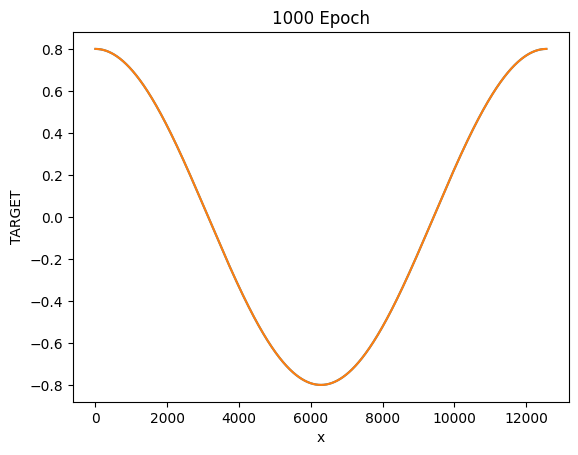

In [15]:
plt.title("1000 Epoch")
plt.xlabel('x')
plt.ylabel("TARGET")
plt.plot([predict_y_info(result_a_3, result_b_3, result_c_3, result_d_3, iterator)for iterator in value_x_train[:-1]])
plt.plot(value_target_train)

plt.show()

In [16]:
results_train_4, result_a_4, result_b_4, result_c_4, result_d_4 = gradient_descent_function(value_x_train, value_target_train, epochs=2000)

error:0.2253968658055684 period:0.48512620738370105 amplitude:0.16087952572230876 constants:0.6413368770725513

error:0.2412176431838278 period:0.47031544507624895 amplitude:0.18984511247119826 constants:0.6380243231840156

error:0.211397015233001 period:0.4551945179695226 amplitude:0.2144059348859625 constants:0.6341301220616236

error:0.19016627269469819 period:0.4562431768573086 amplitude:0.24075635386256872 constants:0.632118599203511

error:0.1768426312661017 period:0.44517741293033064 amplitude:0.2653816025502561 constants:0.6288873553245036

error:0.18452225476111717 period:0.4392935045161061 amplitude:0.29189692326965105 constants:0.6253850809274042

error:0.15961963882952837 period:0.4374392229143382 amplitude:0.3152727343192046 constants:0.6221680615115529

error:0.14277597071744202 period:0.43808073481654375 amplitude:0.33692395539900855 constants:0.6191646064750028

error:0.12406624994529729 period:0.4405201102754826 amplitude:0.3577259762112612 constants:0.6169420559105314

In [17]:
dataframe_result_train_4 = pd.DataFrame(results_train_4, columns=['Amplitude', 'Period', 'Constant', 'D', 'Error'])
dataframe_result_train_4.head(12)

Amplitude    Period  Constant  D     Error
0    0.160880  0.485126  0.641337  0  0.225397
1    0.189845  0.470315  0.638024  0  0.241218
2    0.214406  0.455195  0.634130  0  0.211397
3    0.240756  0.456243  0.632119  0  0.190166
4    0.265382  0.445177  0.628887  0  0.176843
5    0.291897  0.439294  0.625385  0  0.184522
6    0.315273  0.437439  0.622168  0  0.159620
7    0.336924  0.438081  0.619165  0  0.142776
8    0.357726  0.440520  0.616942  0  0.124066
9    0.376986  0.435313  0.613402  0  0.118428
10   0.394685  0.435918  0.610145  0  0.110180
11   0.415519  0.434756  0.606464  0  0.119769

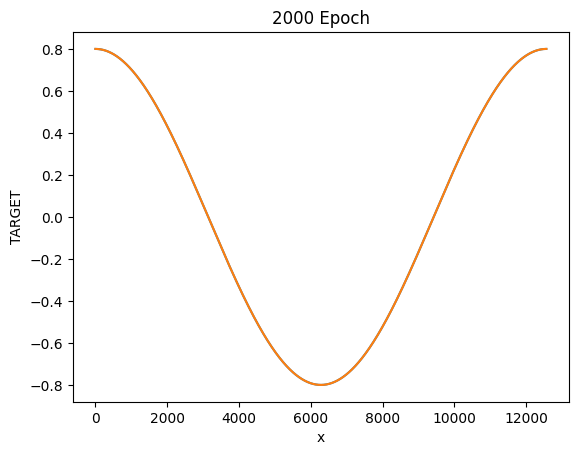

In [18]:
plt.title("2000 Epoch")
plt.xlabel('x')
plt.ylabel("TARGET")
plt.plot([predict_y_info(result_a_4, result_b_4, result_c_4, result_d_4, iterator)for iterator in value_x_train[:-1]])
plt.plot(value_target_train)

plt.show()

In [19]:
x_min = 0
x_max = 20 * math.pi
time_step = 0.001
time = np.arange(x_min, x_max, time_step)

In [20]:
long_signal = [predict_y_info(result_a_3, result_b_3, result_c_3, 0, xi) for xi in np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)]

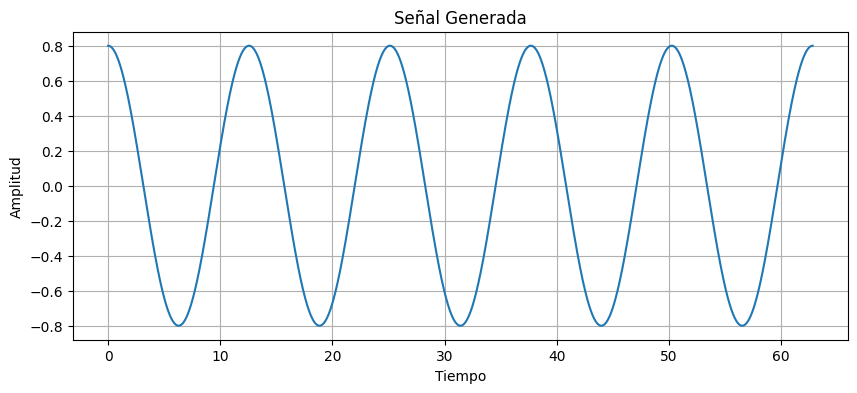

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(time, long_signal)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Se√±al Generada")
plt.grid()
plt.show()

In [22]:
sd.play(long_signal)
sd.wait()

In [23]:
data_test = pd.read_csv('dataSenal/test.csv')

In [24]:
value_x_test = data_test['x'].values
value_example_id = data_test['example_id'].values

In [25]:
TARGET_test = [predict_y_info(result_a_4, result_b_4, result_c_4, result_d_4, iterator) for iterator in value_x_test[0:]]

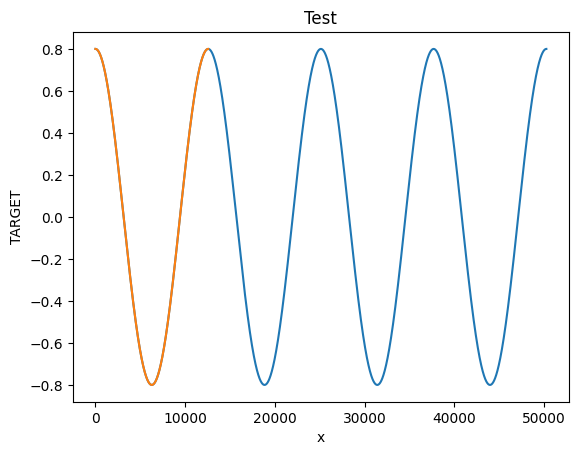

In [26]:
plt.title("Test")
plt.xlabel('x')
plt.ylabel("TARGET")
plt.plot(TARGET_test)
plt.plot(value_target_train)

plt.show()

In [33]:
#value_example_id_adjusted = value_example_id - value_example_id[0]
#value_example_id_adjusted = value_example_id_adjusted.astype(int)

df = pd.DataFrame({'example_id': value_example_id, 'target': TARGET_test})

root_result = 'result/punto1/'
df.to_csv(root_result+'solucion3.csv', index=False)